# TSARNN Homework 4 - Maximilian Rokuss and Julius Meyer-Ohlendorf



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR

### Task 1.1

In [28]:
T = 1000
a0 = np.array([0,0])[np.newaxis].T
A1 = np.array([[0.2, 0],[-0.2, 0.1]])
A2 = np.array([[0.1, 0],[-0.1, 0.1]])
Sigma = np.array([[0.01, 0],[0, 0.01]])
sigma = np.sqrt(0.01)

x0 = np.array([0,0])[np.newaxis].T

x = np.zeros((2,T))[np.newaxis].T
x[0] = x0
x[1] = A1@x[0] + sigma*np.random.randn(2)[np.newaxis].T

for k in range(2,T):
  x[k] = A1@x[k-1] + A2@x[k-2] + sigma*np.random.randn(2)[np.newaxis].T

x.shape

(1000, 2, 1)

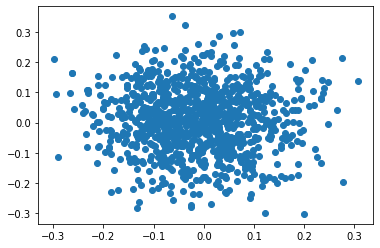

In [30]:
plt.scatter(x[:,0,0],x[:,1,0])

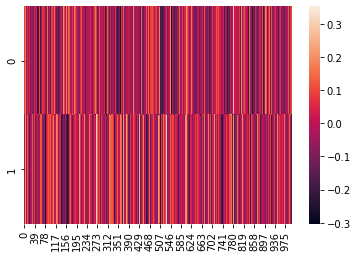

In [31]:
ax = sns.heatmap(x[:,:,0].T)

### Task 1.2

Looking at the matrices $A_1$ and $A_2$ it becomes evident that only $x_1$ Granger causes $x_2$ since in both matrices the upper left element is zero however the lower left is non zero.

### Task 1.3

In [32]:
K = 2
p = 2

# Null hypothesis: All dependencies on other time series than the same one are zero

model = VAR(x[:,:,0])
results = model.fit(p)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 06, Dec, 2020
Time:                     22:07:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.10091
Nobs:                     998.000    HQIC:                  -9.13139
Log likelihood:           1743.68    FPE:                0.000106212
AIC:                     -9.15007    Det(Omega_mle):     0.000105156
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.008461         0.003157           -2.680           0.007
L1.y1         0.192483         0.031619            6.088           0.000
L1.y2        -0.001353         0.029639           -0.046           0.964
L2.y1         0.073091

In [33]:
results.test_causality(0,1,kind='f').summary()

Test statistic,Critical value,p-value,df
1.111,3.000,0.330,"(2, 1986)"


In [34]:
results.test_causality(1,0,kind='f').summary()

Test statistic,Critical value,p-value,df
26.08,3.000,0.000,"(2, 1986)"
